# Analytics Data of Best Developers From Web Scraping

## Introduction

### Web Scraping

Web scraping is the process of extracting data from websites. It is all about downloading web pages and parsing the contents to get useful information. This is able to collect data automatically for different applications including market research, price comparison and analysis. Azcopy always ensures to follow all the legal and ethical guidelines in scraping data from websites.


### Topdevelopers.co

topdevelopers.co - It is a kind of website page where in companies deals with different tech services are given (querySelector). The aim of this project is to scrape extensive details about the Big Data Analytics companies from Topdevelopers. These are the key pieces of information that you can use to help distinguish yourself on co, like name and location as well as service types and customer reviews.

### Problem Statement

Remember that the purpose of this project is do the data mining from topdevelopers.co site. co to assist interested parties in discovering effective and efficient Big Data Analytics services.

### Tools Used 
 - Python

 - Requests

- BeautifulSoup

- Pandas

### Steps to FollowS
crap certain agency: We are going to scrap https://www.topdevelopers.co/ We will receive a list of companies. We will receive the name of each company along with its location, services and client reviews.

### Data Extraction: 
 What data we will extract:
 - Company name

 - Description

 - Number of employees

 - Per-hour cost

 - Project cost

 - Country

### Data Storage:
The data extracted will be stored in a structured way to the CSV file.
like this:- 

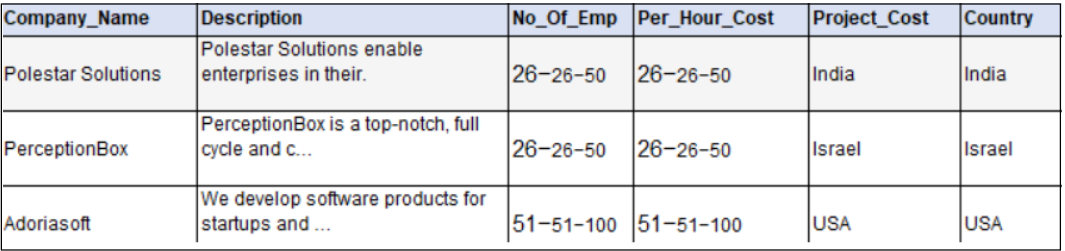

###  Code Implementation
### Downloading the Page

In [34]:
import requests
from bs4 import BeautifulSoup

def get_company_page():
    url = "https://www.topdevelopers.co/directory/big-data-analytics-companies"
    response = requests.get(url)
    if response.status_code != 200:
        raise Exception(f'Failed to load page {url}')
    doc = BeautifulSoup(response.content, 'html.parser')
    doc1 = doc.find('div', class_="col-xl-12 col-lg-12 comp_listing list_holder")
    return doc, doc1  # Return both doc and doc1 as a tuple

# Now you can use the function to get the desired content
doc, doc1 = get_company_page()

Let's create some helper function to parse information from the page.

To get company name, we can pick "span" tags wtih the "class" 'itemprop= name'

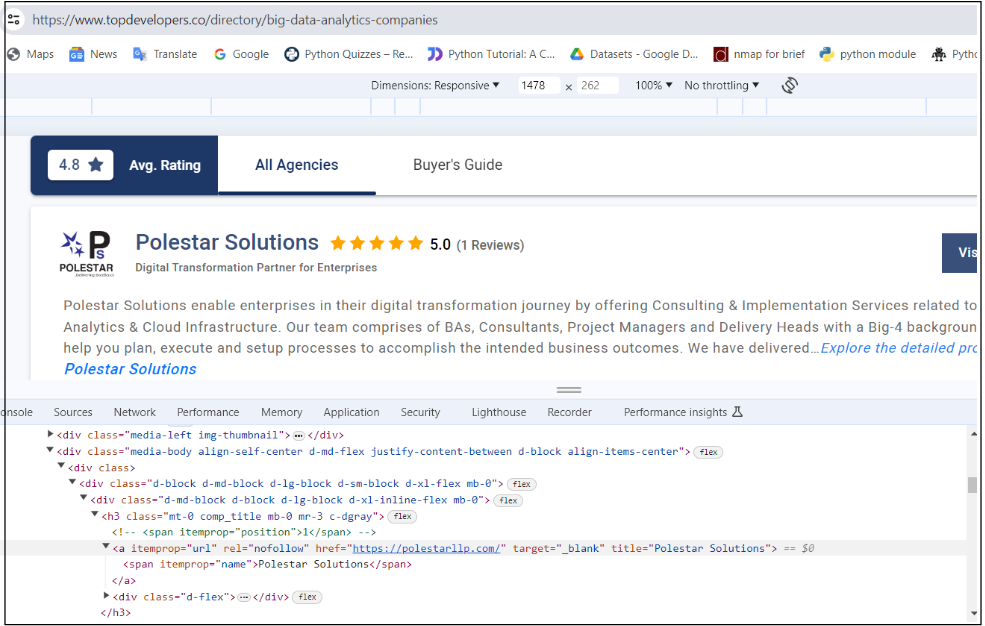

### Parsing Company Information

In [35]:
# create function to extract company name

def get_company_name(doc1):
    item = doc1.find_all("span", itemprop="name")
    company_name = []
    for i in item:
        company_name.append(i.text.strip())
    return company_name

In [36]:
company_name = get_company_name(doc1)

In [37]:
company_name[:5]

['Polestar Solutions',
 'PerceptionBox',
 'Adoriasoft',
 'Emorphis Technologies',
 'ITRex Group']

In [38]:
# create new function to extract description

def get_description(doc1):
    descrp = doc1.find_all("span", itemprop="description")
    description = []
    for i in descrp:
        description.append(i.text.strip())
    return description

In [39]:
description = get_description(doc1)

In [40]:
description[:2]

['Polestar Solutions enable enterprises in their digital transformation journey by offering Consulting & Implementation Services related to Data, Analytics & Cloud Infrastructure. Our team comprises of BAs, Consultants, Project Managers and Delivery Heads with a Big-4 background. Our experts help you plan, execute and setup processes to accomplish the intended business outcomes. We have delivered…',
 'PerceptionBox is a top-notch, full cycle and client-focused development service provider. From full-service developments to a la carte services, we guide and help our clients to launch the most scalable digital products. We always act as your partner and safely guide you through the thorns of the world of technologies & software up to the skies of business success. With the astonishing design, amazing development, agile management and great quality assurance we do our best to skyrocket business of our partners with blazing custom software development…']

In [41]:
# create function to extract No of employees

def get_no_of_emp(doc):
    emp1 = doc.find_all("div",class_="col-xl-10 col-lg-10 col-md-10 col-sm-12 col-12")    
    no_of_emp = []
    for i in emp1:
        p_tage = i.find_all("p", class_="mb-0 set_es_p")
        if p_tage:
            no_of_emp.append(p_tage[0].text.strip())
    return no_of_emp

In [42]:
no_of_emp = get_no_of_emp(doc)

In [43]:
no_of_emp[:5]

['51 to 250', '51 to 250', '11 to 50', '51 to 250', '251 to 1000']

In [44]:
# create function to extract employees per hour cost

def get_per_hour_cost(doc):
    
    emp1 = doc.find_all("div", class_="col-xl-10 col-lg-10 col-md-10 col-sm-12 col-12")
    per_hour_cost = []
    for i in emp1:
        p_tage = i.find_all("p", class_="mb-0 set_es_p")
        if p_tage:
            per_hour_cost.append(p_tage[1].text.strip())
    return per_hour_cost

In [45]:
per_hour_cost = get_per_hour_cost(doc)

In [46]:
per_hour_cost[:5]

['$26 - $50', '$26 - $50', '$51 - $100', '$26 - $50', '$26 - $50']

In [47]:
# create function to extract project cost
def get_project_cost(doc):
    
    emp1 = doc.find_all("div", class_="col-xl-10 col-lg-10 col-md-10 col-sm-12 col-12")
    project_cost = []
    for i in emp1:
        p_tage = i.find_all("p", class_="mb-0 set_es_p")
        if p_tage:
            project_cost.append(p_tage[2].text.strip())
    return project_cost

In [48]:
project_cost = get_project_cost(doc)

In [49]:
project_cost[:5]

['$10001 - $25000',
 '$10001 - $25000',
 '$10001 - $25000',
 'Less than - $5000',
 '$50001 - $100000']

In [50]:
# lets create function to extract country name
def get_country(doc):
    
    country = []
    emp1 = doc.find_all("div", class_="col-xl-10 col-lg-10 col-md-10 col-sm-12 col-12")
    for i in emp1:
        p_tage = i.find_all("p", class_="mb-0 set_es_p")
        if p_tage:
            country.append(p_tage[3].text.strip())
    return country

In [51]:
country = get_country(doc)

In [52]:
country[:5]

['India', 'Israel', 'USA', 'USA', 'USA, Ukraine']

### Let's combine all the data and scrape multiple pages.

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Lists to store the scraped data
company_name = []
description = []
no_of_emp = []
per_hour_cost = []
project_cost = []
country = []

n = int(input("How many pages do you want: "))

for i in range(1, n + 1):
    url = f"https://www.topdevelopers.co/directory/big-data-analytics-companies?page={i}"
    response = requests.get(url)
    page_contents = response.text
    doc = BeautifulSoup(page_contents, 'html.parser')
    doc1 = doc.find('div', class_="col-xl-12 col-lg-12 comp_listing list_holder")
    emp1 = doc.find_all("div", class_="col-xl-10 col-lg-10 col-md-10 col-sm-12 col-12")

    # Extracting company names
    items = doc1.find_all("span", itemprop="name")
    for item in items:
        company_name.append(item.text.strip())

    # Extracting descriptions
    descriptions = doc1.find_all("span", itemprop="description")
    for desc in descriptions:
        description.append(desc.text.strip())

    # Extracting employee details, cost, and country information
    for emp in emp1:
        p_tages = emp.find_all("p", class_="mb-0 set_es_p")
        if len(p_tages) >= 4:  # Ensure there are enough p tags
            no_of_emp.append(p_tages[0].text.strip())
            per_hour_cost.append(p_tages[1].text.strip())
            project_cost.append(p_tages[2].text.strip())
            country.append(p_tages[3].text.strip())
        else:
            no_of_emp.append(None)
            per_hour_cost.append(None)
            project_cost.append(None)
            country.append(None)

# Ensure all lists are of the same length
length = min(len(company_name), len(description), len(no_of_emp), len(per_hour_cost), len(project_cost), len(country))
data = {
    "Company_Name": company_name[:length],
    "Description": description[:length],
    "No_Of_Emp": no_of_emp[:length],
    "Per_Hour_Cost": per_hour_cost[:length],
    "Project_Cost": project_cost[:length],
    "Country": country[:length]
}

# Creating the DataFrame
df = pd.DataFrame(data)
df

How many pages do you want: 28


,Company_Name,Description,No_Of_Emp,Per_Hour_Cost,Project_Cost,Country
0,Polestar Solutions,Polestar Solutions enable enterprises in their...,51 to 250,$26 - $50,$10001 - $25000,India
1,PerceptionBox,"PerceptionBox is a top-notch, full cycle and c...",51 to 250,$26 - $50,$10001 - $25000,Israel
2,Adoriasoft,We develop software products for startups and ...,11 to 50,$51 - $100,$10001 - $25000,USA
3,Emorphis Technologies,Emorphis Technologies has a global specializat...,51 to 250,$26 - $50,Less than - $5000,USA
4,ITRex Group,ITRex is a software development company specia...,251 to 1000,$26 - $50,$50001 - $100000,"USA, Ukraine"
...,...,...,...,...,...,...
970,Widerix,We believe in the transformative power of Arti...,2 to 10,$26 - $50,$5001 - $10000,USA
971,ScatterPie Analytics,"In today's dynamic business landscape, the cap...",51 to 250,$51 - $100,$25001 - $50000,India
972,Spiral Mantra Pvt Ltd.,We have highly skilled engineers with in-depth...,11 to 50,$26 - $50,$5001 - $10000,"India, USA"
973,Sync4Tech,Sync4Tech is your global software development ...,51 to 250,$26 - $50,$5001 - $10000,Pakistan


In [2]:
df.head(10)

,Company_Name,Description,No_Of_Emp,Per_Hour_Cost,Project_Cost,Country
0,Polestar Solutions,Polestar Solutions enable enterprises in their...,51 to 250,$26 - $50,$10001 - $25000,India
1,PerceptionBox,"PerceptionBox is a top-notch, full cycle and c...",51 to 250,$26 - $50,$10001 - $25000,Israel
2,Adoriasoft,We develop software products for startups and ...,11 to 50,$51 - $100,$10001 - $25000,USA
3,Emorphis Technologies,Emorphis Technologies has a global specializat...,51 to 250,$26 - $50,Less than - $5000,USA
4,ITRex Group,ITRex is a software development company specia...,251 to 1000,$26 - $50,$50001 - $100000,"USA, Ukraine"
5,Guavus,We at Guavus have always been at the forefront...,251 to 1000,$201 - $300,$100001 - $200000,USA
6,ThirdEye Data,ThirdEye Data leverages Artificial Intelligenc...,51 to 250,$51 - $100,$25001 - $50000,USA
7,Sigma Data Systems,"Sigma Data Systems, one of the best Data Scien...",51 to 250,Up to $25,$10001 - $25000,"USA, India"
8,Indium Software,Indium Software is a leading provider of Digit...,251 to 1000,$26 - $50,$50001 - $100000,USA
9,Clairvoyant,Clairvoyant is a global technology consulting ...,251 to 1000,$26 - $50,$50001 - $100000,USA


In [3]:
df.tail(10)

,Company_Name,Description,No_Of_Emp,Per_Hour_Cost,Project_Cost,Country
965,Webzian Digital Services,Webzian is an IT company helping diverse busin...,11 to 50,$26 - $50,$5001 - $10000,Canada
966,Massapequa SEO,Massapequa SEO is a complete online marketing ...,2 to 10,Up to $25,Less than - $5000,USA
967,Modsen,Hello and welcome to our TopDevelopers profile...,251 to 1000,$26 - $50,$10001 - $25000,Poland
968,Smartdata-Software Development,Smartdata is a custom software development com...,51 to 250,Up to $25,Less than - $5000,USA
969,BeeWeb,BeeWeb is a software development company with ...,11 to 50,$26 - $50,$5001 - $10000,Armenia
970,Widerix,We believe in the transformative power of Arti...,2 to 10,$26 - $50,$5001 - $10000,USA
971,ScatterPie Analytics,"In today's dynamic business landscape, the cap...",51 to 250,$51 - $100,$25001 - $50000,India
972,Spiral Mantra Pvt Ltd.,We have highly skilled engineers with in-depth...,11 to 50,$26 - $50,$5001 - $10000,"India, USA"
973,Sync4Tech,Sync4Tech is your global software development ...,51 to 250,$26 - $50,$5001 - $10000,Pakistan
974,Deftsoft,Deftsoft is a thriving tech company that provi...,251 to 1000,Up to $25,Less than - $5000,India


# Create CSV file(s) with the extracted information

In [5]:
df.to_csv('df.csv',index=None)

## Summary 


This initiative provides a complete way to extract data from the website topdevelopers.co. They help to effectively build highly sought after intelligence on Big Data Analytics firms crossing your path making your decision easier and less time consuming! Using Python using libraries like Requests, BeautifulSoup and Pandas assures a robust program which can be easily scalable. 

Thank you for the support